# Corey Austen - Homework 1 - Notebook 3

a) Build at least four models from the above list. Make sure your coefficients and the MSE are printed. Also, add in two other regression error metric to help determine the best(better) model. http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

b) In your models that has a penalty parameter, tune it with a grid search. Explain what the grid search is doing (I know it is searching for different alphas (the penalty)- so explain why you would do this). Make some explanation of how what occurred as you changed the penalty. 

c) On another model, add a cross validation to it. Explain what this is doing.

d) Discuss your optimal model with the optional parameters.

e) optional- get creative and see what else you can do with GLM in Sklearn.  

On the above- don’t fret if you get bad results on one or more models. The objective is to get your playing with Scikit and thinking about advanced GLM models used in data mining.  Comment (in markup) about how each model performed and what you learned from each penalized (regularized) model. 

Enter your answers as brief comments in a markdown code block. Ie everything should be nicely done in one Juyter notebook.
You should create one .html python file for this warm up. 

### Importing packages and loading data into dataframe from URL

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data', 
                 header=None, sep=',')

### Setting column names as listed in the data documentation

In [58]:
df.columns = ['state','county','community','communityname','fold','population','householdsize','racepctblack','racePctWhite','racePctAsian','racePctHisp','agePct12t21','agePct12t29','agePct16t24','agePct65up','numbUrban','pctUrban','medIncome','pctWWage','pctWFarmSelf','pctWInvInc','pctWSocSec','pctWPubAsst','pctWRetire','medFamInc','perCapInc','whitePerCap','blackPerCap','indianPerCap','AsianPerCap','OtherPerCap','HispPerCap','NumUnderPov','PctPopUnderPov','PctLess9thGrade','PctNotHSGrad','PctBSorMore','PctUnemployed','PctEmploy','PctEmplManu','PctEmplProfServ','PctOccupManu','PctOccupMgmtProf','MalePctDivorce','MalePctNevMarr','FemalePctDiv','TotalPctDiv','PersPerFam','PctFam2Par','PctKids2Par','PctYoungKids2Par','PctTeen2Par','PctWorkMomYoungKids','PctWorkMom','NumIlleg','PctIlleg','NumImmig','PctImmigRecent','PctImmigRec5','PctImmigRec8','PctImmigRec10','PctRecentImmig','PctRecImmig5','PctRecImmig8','PctRecImmig10','PctSpeakEnglOnly','PctNotSpeakEnglWell','PctLargHouseFam','PctLargHouseOccup','PersPerOccupHous','PersPerOwnOccHous','PersPerRentOccHous','PctPersOwnOccup','PctPersDenseHous','PctHousLess3BR','MedNumBR','HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded','PctVacMore6Mos','MedYrHousBuilt','PctHousNoPhone','PctWOFullPlumb','OwnOccLowQuart','OwnOccMedVal','OwnOccHiQuart','RentLowQ','RentMedian','RentHighQ','MedRent','MedRentPctHousInc','MedOwnCostPctInc','MedOwnCostPctIncNoMtg','NumInShelters','NumStreet','PctForeignBorn','PctBornSameState','PctSameHouse85','PctSameCity85','PctSameState85','LemasSwornFT','LemasSwFTPerPop','LemasSwFTFieldOps','LemasSwFTFieldPerPop','LemasTotalReq','LemasTotReqPerPop','PolicReqPerOffic','PolicPerPop','RacialMatchCommPol','PctPolicWhite','PctPolicBlack','PctPolicHisp','PctPolicAsian','PctPolicMinor','OfficAssgnDrugUnits','NumKindsDrugsSeiz','PolicAveOTWorked','LandArea','PopDens','PctUsePubTrans','PolicCars','PolicOperBudg','LemasPctPolicOnPatr','LemasGangUnitDeploy','LemasPctOfficDrugUn','PolicBudgPerPop','ViolentCrimesPerPop']

In [59]:
df.head(10)

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
5,6,?,?,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.01,0.58,0.10,?,?,?,?,0.00,?,0.14
6,44,7,41500,Lincolntown,1,0.01,0.39,0.00,0.98,0.06,...,0.05,0.08,0.06,?,?,?,?,0.00,?,0.03
7,6,?,?,Selmacity,1,0.01,0.74,0.03,0.46,0.20,...,0.01,0.33,0.00,?,?,?,?,0.00,?,0.55
8,21,?,?,Hendersoncity,1,0.03,0.34,0.20,0.84,0.02,...,0.04,0.17,0.04,?,?,?,?,0.00,?,0.53
9,29,?,?,Claytoncity,1,0.01,0.40,0.06,0.87,0.30,...,0.00,0.47,0.11,?,?,?,?,0.00,?,0.15


There seems to be a lot of data missing in several of these columns

In [60]:
#Set the target variable as ViolentCrimesPerPop and moving it to the front of the dataframe.
# designate target variable name
targetName = 'ViolentCrimesPerPop'
targetSeries = df[targetName]
del df[targetName]
df.insert(0, targetName, targetSeries)
#reprint dataframe and see target is in position 0
df.head(10)

,ViolentCrimesPerPop,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,0.20,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,...,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14
1,0.67,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,...,?,0.02,0.12,0.45,?,?,?,?,0.00,?
2,0.43,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,...,?,0.01,0.21,0.02,?,?,?,?,0.00,?
3,0.12,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,...,?,0.02,0.39,0.28,?,?,?,?,0.00,?
4,0.03,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,...,?,0.04,0.09,0.02,?,?,?,?,0.00,?
5,0.14,6,?,?,SouthPasadenacity,1,0.02,0.28,0.06,0.54,...,?,0.01,0.58,0.10,?,?,?,?,0.00,?
6,0.03,44,7,41500,Lincolntown,1,0.01,0.39,0.00,0.98,...,?,0.05,0.08,0.06,?,?,?,?,0.00,?
7,0.55,6,?,?,Selmacity,1,0.01,0.74,0.03,0.46,...,?,0.01,0.33,0.00,?,?,?,?,0.00,?
8,0.53,21,?,?,Hendersoncity,1,0.03,0.34,0.20,0.84,...,?,0.04,0.17,0.04,?,?,?,?,0.00,?
9,0.15,29,?,?,Claytoncity,1,0.01,0.40,0.06,0.87,...,?,0.00,0.47,0.11,?,?,?,?,0.00,?


Per the documentation on the data, the information below is not considered predictive and is for information only.

-- state: US state (by number) - not counted as predictive above, but if considered, should be consided nominal (nominal)

-- county: numeric code for county - not predictive, and many missing values (numeric) 

-- community: numeric code for community - not predictive and many missing values (numeric) 

-- communityname: community name - not predictive - for information only (string)

-- fold: fold number for non-random 10 fold cross validation, potentially useful for debugging, paired tests - not predictive (numeric) 

In [61]:
#Removing the non-predictive features.
del df['state']
del df['county']
del df['community']
del df['communityname']
del df['fold']

In [62]:
#Turning the question marks into null values so they are easier to deal with.
df=df.replace('?',np.NaN)

In [65]:
#This function will find all missing values and which row they are in.
#Credit to Nikos T. - https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe/26266451

def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
    
missing_values_table(df)

Your selected dataframe has 123 columns.
There are 23 columns that have missing values.


,Missing Values,% of Total Values
PctPolicBlack,1675,84.0
PctPolicHisp,1675,84.0
LemasGangUnitDeploy,1675,84.0
LemasPctPolicOnPatr,1675,84.0
PolicOperBudg,1675,84.0
PolicCars,1675,84.0
PolicAveOTWorked,1675,84.0
NumKindsDrugsSeiz,1675,84.0
OfficAssgnDrugUnits,1675,84.0
PctPolicMinor,1675,84.0


Some of these columns are missing so much data that I doubt they would be helpful in building a model.  I'm going to go ahead and remove them since only 15% of the data has these values defined.

In [69]:
#Removing features with overwhelming missing values.
del df['LemasSwornFT']
del df['LemasSwFTPerPop']
del df['LemasSwFTFieldOps']
del df['LemasSwFTFieldPerPop']
del df['LemasTotalReq']
del df['LemasTotReqPerPop']
del df['PolicReqPerOffic']
del df['PolicPerPop']
del df['RacialMatchCommPol']
del df['PctPolicWhite']
del df['PctPolicBlack']
del df['PctPolicHisp']
del df['PctPolicAsian']
del df['PctPolicMinor']
del df['OfficAssgnDrugUnits']
del df['NumKindsDrugsSeiz']
del df['PolicAveOTWorked']
del df['PolicCars']
del df['PolicOperBudg']
del df['LemasPctPolicOnPatr']
del df['LemasGangUnitDeploy']
del df['PolicBudgPerPop']

One of the columns was only missing 1 value, so I'll replace that one with the median value.

In [70]:
#One of the columns was only missing 1 value, so I'll replace that one with the median value.
df.OtherPerCap = df.OtherPerCap.fillna(df.OtherPerCap.median())

### Setting the Target and the Features

In [83]:
#setting the target and features
df.target=df['ViolentCrimesPerPop'] 
df.features=df.drop(['ViolentCrimesPerPop'], axis=1)                         
print(df.target.shape)
print(df.features.shape)

(1994,)
(1994, 100)


## Regression Models

### Linear Regression

In [84]:
# Linear Regression-Ordinary Least Squares
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

# fit a linear regression model to the data
model_LR = LinearRegression(normalize=True)
model_LR.fit(df.features, df.target)
print(model_LR)
# make predictions
expected = df.target
predicted = model_LR.predict(df.features)
# summarize the fit of the model
mse = np.mean((predicted-expected)**2)
print("Coef", model_LR.intercept_,model_LR.coef_)
print("Mean Squared Error =", mse)
print("Linear Regression Score =",model_LR.score(df.features, df.target))
print("Explained Varience Score", explained_variance_score(expected, predicted))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
Coef 0.5660519930824732 [ 0.15724277 -0.02246871  0.20288571 -0.04966507 -0.01561229  0.05622692
  0.11134266 -0.22813107 -0.13735394  0.04413096 -0.28068708  0.04662837
 -0.19168087 -0.19974038  0.04802894 -0.17740174  0.07987404  0.00651194
 -0.08838557  0.28654394  0.099434   -0.35426759 -0.02866612 -0.03529936
  0.02161572  0.04396006  0.0327349   0.12037039 -0.17949195 -0.10552605
  0.06004752  0.05695095  0.00116425  0.24827979 -0.06534266 -0.02195025
  0.073933    0.11010004  0.4345907   0.23054866  0.13836649 -0.52112832
 -0.1428895   0.01915392 -0.32587787 -0.03051027 -0.0023472   0.05744822
 -0.18530297 -0.13479895  0.11632769 -0.14530223  0.02194012  0.03367093
 -0.07630494  0.03813032 -0.02712175 -0.21350282  0.43186714 -0.18985548
 -0.03087223 -0.15346484  0.05130722 -0.20070739  0.63752613 -0.07887563
 -0.25781741 -0.66818539  0.217424    0.10134232  0.02974883  0.15981353
 -0.04751998  0.55705167

### Linear Regression - Cross Validation

In [101]:
#verify LR with Cross Validation
from sklearn.model_selection  import  cross_val_score
scores = cross_val_score(model_LR, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean()   

Cross Validation Score for each K [0.66711298 0.67571478 0.62427319 0.69853101 0.64998133 0.62115738
 0.62827185 0.50237139 0.63101907 0.69020684]


0.6388639816243225

### Linear Regression - Coefficient Variance

I have added a cross validation to the linear regression model for additional analysis.  The cross validation runs the model 5 times to see if the accuracy is consistant or if there is high levels of variance, which would mean the model is overfit.  In this case, the model varies widely, from 50% to 70%, so this model suffers from overfitting.

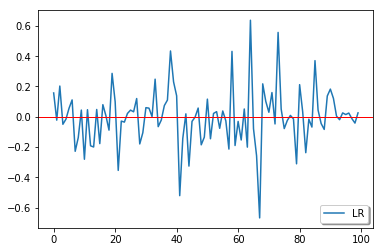

In [100]:
#Showing the variance of the Coefficient for LR
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.plot(model_LR.coef_, label='LR')
plt.axhline(linewidth=1, color='r') # for reference
legend = ax.legend(loc='lower right', shadow=True)
plt.show()

### Ridge Regression

The Ridge Model did far better than the Linear Regression Model and could potentially be the best suited model for the data.

In [94]:
# Ridge Regression
import numpy as np
from sklearn import datasets
from sklearn.linear_model import Ridge
# fit a ridge regression model to the data
model_rr = Ridge(alpha=1.7)
model_rr.fit(df.features, df.target)
print(model_rr)
# make predictions
expected = df.target
predicted = model_rr.predict(df.features)
# summarize the fit of the model
mse = np.mean((predicted-expected)**2)
print("Coef", model_rr.intercept_,model_rr.coef_)
print("Mean Squared Error =", mse)
print("Ridge Regression Score =",model_rr.score(df.features, df.target))
print("Explained Varience Score", explained_variance_score(expected, predicted))

Ridge(alpha=1.7, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Coef 0.4959667050766815 [-0.03313536  0.02714724  0.17533771 -0.06283635 -0.02075983  0.04382557
  0.02193051 -0.13909596 -0.03189844  0.04406061 -0.04928203  0.03926317
  0.03710027 -0.1018843   0.0343111  -0.13647751  0.05025164  0.01939674
 -0.0770652   0.0429135  -0.02389925 -0.12380926 -0.02128417 -0.03002736
  0.02700913  0.04320412  0.02715672  0.01738202 -0.12377332 -0.07934325
  0.04195652  0.03649369 -0.02340476  0.11967348 -0.05100439 -0.0113973
  0.05561917  0.0389445   0.13676668  0.11463391 -0.07240703 -0.01233482
  0.02661466 -0.07013146 -0.15557279 -0.05004054 -0.01295287  0.02200829
 -0.13070705 -0.03870283  0.14145397 -0.07705995  0.02009603 -0.00848275
 -0.01715204  0.00361203 -0.01859165 -0.01295875  0.04996937  0.02941639
 -0.00648897 -0.0862786  -0.04414793 -0.04706112  0.13815696 -0.05888014
 -0.03342276 -0.08467199  0.14296147  0.0599

### Ridge Regression - Grid Search/Cross Validation
The grid search works by taking the range of alphas I enter and runs 5 models with those alphas.  It will then take the average score of those models and return the alpha with the best performance.  The 'alpha', or the penalty, is set in such a way to penalize an extreme feature.  This works to keep features from throwing off the model with extreme values.

The 'alpha' that best fit this model is 1.7.  I was able to find this by running the below gridsearch over several alpha ranges to pinpoint the best suited.  I started with five numbers in the range of .01 to 5, then take the best one and center on that number in a tighter and tighter range until I was comfortable with the precision.  Changing to the new alpha caused the score to go up and the MSE to come down.

The penalty in the Ridge Regression Model is applied to all features at once, which is different than some of the other models listed.

In [64]:
# use a full grid over several parameters and cross validate 5 times
from sklearn.model_selection import GridSearchCV
param_grid = {"alpha": [1.6, 1.65, 1.7, 1.75, 1.8]}

# run grid search
grid_search = GridSearchCV(model_rr, param_grid=param_grid,n_jobs=-1,cv=5)
grid_search.fit(df.features, df.target)
print("Grid Scores", grid_search.cv_results_)
print("Best", grid_search.best_params_)   

Grid Scores {'mean_fit_time': array([0.04741335, 0.03359995, 0.03279943, 0.03599916, 0.03680124]), 'std_fit_time': array([0.01336216, 0.00480116, 0.0029904 , 0.00876541, 0.01197249]), 'mean_score_time': array([0.00558267, 0.00480032, 0.00880113, 0.00560083, 0.00399852]), 'std_score_time': array([0.00321434, 0.00160015, 0.00466416, 0.00195844, 0.00252881]), 'param_alpha': masked_array(data=[1.6, 1.65, 1.7, 1.75, 1.8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 1.6}, {'alpha': 1.65}, {'alpha': 1.7}, {'alpha': 1.75}, {'alpha': 1.8}], 'split0_test_score': array([0.61452071, 0.61452756, 0.61453183, 0.6145337 , 0.61453333]), 'split1_test_score': array([0.64130432, 0.64125182, 0.64119907, 0.6411462 , 0.64109329]), 'split2_test_score': array([0.71886752, 0.71877099, 0.7186743 , 0.71857755, 0.71848083]), 'split3_test_score': array([0.67297829, 0.67300571, 0.67303192, 0.67305698, 0.67308094]), 'split4_test_score':

### Ridge Regression - Coefficient Variance Comparison

The chart below shows the difference in coefficient variance between the models.  The variance in the Ridge Regression model is less extreme than the Linear Regression model because of the the tuned 'penalty'.

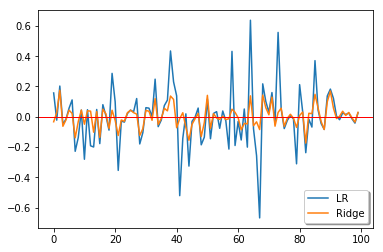

In [95]:
fig, ax = plt.subplots()
plt.plot(model_LR.coef_, label='LR')
plt.plot(model_rr.coef_, label='Ridge')
plt.axhline(linewidth=1, color='r') # for reference
legend = ax.legend(loc='lower right', shadow=True)
plt.show()

### Lasso Regression

The Lasso Model didn't perform as well as the Ridge Model, but still did better than the Linear Regression Model.

In [91]:
# Lasso Regression
# fit a LASSO model to the data
from sklearn.linear_model import Lasso
model_lr = Lasso(alpha=.01)
model_lr.fit(df.features, df.target)
print(model_lr)
# make predictions
expected = df.target
predicted = model_lr.predict(df.features)
# summarize the fit of the model
mse = np.mean((predicted-expected)**2)
print("Coef", model_lr.intercept_,model_lr.coef_)
print("Mean Squared Error =", mse)
print("Linear Regression Score =",model_lr.score(df.features, df.target))
print("Explained Varience Score =", explained_variance_score(expected, predicted))

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Coef 0.4588145567123556 [ 0.         -0.          0.         -0.17599284  0.          0.
 -0.         -0.         -0.          0.          0.          0.
 -0.         -0.         -0.         -0.          0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.          0.          0.          0.
  0.         -0.          0.         -0.         -0.         -0.
  0.         -0.          0.          0.          0.          0.
  0.         -0.         -0.23323255 -0.         -0.         -0.
 -0.          0.          0.22628628  0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.          0.          0.          0.         -0.         -0.
  0.         -0.          0.          0.         -0.          0.
 -0.

### Lasso Regression - Grid Search/Cross Validation

The alpha in this case was very small, closer to 0 than .01.  However, I decided to use .01 rather than 0, as the error message below stated that extremely small alphas can cause precision problems.  Here I also started with a range of 5 numbers between .01 and 5, but this didn't take much tuning to find that the best fit here was almost 0. After tuning, changing to the new alpha caused the score to go up slightly and the MSE to come down very slightly.  The Lasso model also punishes individual features, contrary to the way Ridge models punish all features.

In [69]:
# use a full grid over several parameters and cross validate 5 times
param_grid = {"alpha": [-1, -.1 -.01, 0, .01,]}

# run grid search
grid_search = GridSearchCV(model_lr, param_grid=param_grid,n_jobs=-1,cv=5)
grid_search.fit(df.features, df.target)
print("Grid Scores", grid_search.cv_results_)
print("Best", grid_search.best_params_)  

Grid Scores {'mean_fit_time': array([0.22598686, 0.32331324, 0.33322043, 0.0328001 ]), 'std_fit_time': array([0.09007083, 0.00266699, 0.00934048, 0.00639991]), 'mean_score_time': array([0.02319813, 0.00400405, 0.0055995 , 0.00480037]), 'std_score_time': array([2.49652253e-02, 2.76154179e-06, 1.95943313e-03, 1.59845391e-03]), 'param_alpha': masked_array(data=[-1, -0.11, 0, 0.01],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': -1}, {'alpha': -0.11}, {'alpha': 0}, {'alpha': 0.01}], 'split0_test_score': array([-8.31470866e+06, -1.00615267e+05,  6.08704590e-01,  4.96761368e-01]), 'split1_test_score': array([-9.92621575e+06, -1.20071928e+05,  6.31679956e-01,  5.42759812e-01]), 'split2_test_score': array([-9.72066281e+06, -1.17608513e+05,  7.14710625e-01,  6.11573625e-01]), 'split3_test_score': array([-1.30426282e+07, -1.62847769e+05,  6.69951676e-01,  5.77664135e-01]), 'split4_test_score': array([-9.43894717e+06, -1.1422

C:\Users\ca034330\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\ca034330\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\ca034330\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### Lasso Regression - Coefficient Variance Comparison

You can see here that the Lasso Model wasn't able to reign in the coefficient variance like the Ridge model did.

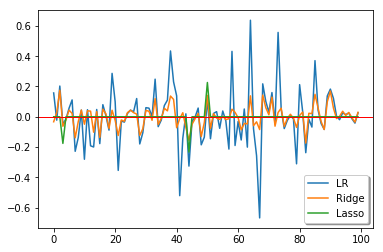

In [96]:
fig, ax = plt.subplots()
plt.plot(model_LR.coef_, label='LR')
plt.plot(model_rr.coef_, label='Ridge')
plt.plot(model_lr.coef_, label='Lasso')
plt.axhline(linewidth=1, color='r') # for reference
legend = ax.legend(loc='lower right', shadow=True)
plt.show()

### Elastic Net Regression

The Elastic Net Model performed better than the Lasso Model, but still not as well as the Ridge Model.  

In [92]:
# ElasticNet Regression
# fit a ElasticNet model to the data
from sklearn.linear_model import ElasticNet
model_en = ElasticNet(alpha=.01)
model_en.fit(df.features, df.target)
print(model_en)
# make predictions
expected = df.target
predicted = model_en.predict(df.features)
# summarize the fit of the model
mse = np.mean((predicted-expected)**2)
print("Coef", model_en.intercept_,model_en.coef_)
print("Mean Squared Error =", mse)
print("ElasticNet Regression Score =",model_en.score(df.features, df.target))
print("Explained Varience Score", explained_variance_score(expected, predicted))

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
Coef 0.4243657391671233 [ 0.         -0.          0.03047299 -0.17518706  0.          0.
 -0.         -0.         -0.          0.          0.          0.02102495
 -0.         -0.         -0.         -0.          0.          0.00161875
 -0.         -0.         -0.         -0.         -0.         -0.
  0.          0.         -0.          0.          0.          0.
  0.         -0.          0.         -0.         -0.         -0.
  0.         -0.          0.03604696  0.          0.          0.0255921
  0.         -0.05221989 -0.16999276 -0.04319085 -0.         -0.
 -0.          0.          0.18761565  0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.          0.          0.          0.         -0.         -0.
  0.         -0.     

### Elastic Net - Grid Search/Cross Validation

This Model also used a very small alpha.  One interesting thing with this model is that is uses a combination of the Ridge and Lasso methods in terms of punishing features.  This could perhaps be why this one fell in the middle in terms of performance between the Ridge and Lasso models.

In [73]:
# use a full grid over several parameters and cross validate 5 times
param_grid = {"alpha": [.01, .1, 1, 2, 5]}

# run grid search
grid_search = GridSearchCV(model_en, param_grid=param_grid,n_jobs=-1,cv=5)
grid_search.fit(df.features, df.target)
print("Grid Scores", grid_search.cv_results_)
print("Best", grid_search.best_params_) 

Grid Scores {'mean_fit_time': array([0.03120251, 0.02640204, 0.03210201, 0.03680301, 0.02800088]), 'std_fit_time': array([0.00891078, 0.0019619 , 0.00544787, 0.00688569, 0.00438151]), 'mean_score_time': array([0.03325648, 0.00480027, 0.00720024, 0.0103982 , 0.00480046]), 'std_score_time': array([0.02769681, 0.00159648, 0.00159943, 0.0019586 , 0.0015965 ]), 'param_alpha': masked_array(data=[0.01, 0.1, 1, 2, 5],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 0.01}, {'alpha': 0.1}, {'alpha': 1}, {'alpha': 2}, {'alpha': 5}], 'split0_test_score': array([ 5.48595705e-01, -8.27313888e-07, -8.27313888e-07, -8.27313888e-07,
       -8.27313888e-07]), 'split1_test_score': array([ 0.58923322, -0.01196901, -0.01196901, -0.01196901, -0.01196901]), 'split2_test_score': array([ 6.62661723e-01, -2.03624241e-04, -2.03624241e-04, -2.03624241e-04,
       -2.03624241e-04]), 'split3_test_score': array([ 0.62982277, -0.00256005, -

### Elastic Net - Coefficient Variance Comparison

Although hard to see, the ElasticNet shows the coefficient variance is between Lasso and Ridge.

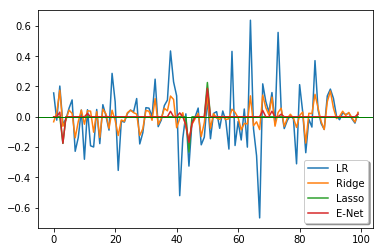

In [97]:
fig, ax = plt.subplots()
plt.plot(model_LR.coef_, label='LR')
plt.plot(model_rr.coef_, label='Ridge')
plt.plot(model_lr.coef_, label='Lasso')
plt.plot(model_en.coef_, label='E-Net')
plt.axhline(linewidth=1, color='g') # for reference
legend = ax.legend(loc='lower right', shadow=True)
plt.show()

### Lasso Lars Regression

This model performed better than both the Elastic Net and Lasso Models, but still didn't do as well as the Ridge Regression Model.

In [98]:
# Lasso Lars Regression
from sklearn import linear_model
model_ll = linear_model.LassoLars(alpha=.0001)
model_ll.fit(df.features, df.target)
print(model_ll)
# make predictions
expected = df.target
predicted = model_ll.predict(df.features)
# summarize the fit of the model
mse = np.mean((predicted-expected)**2)
print("Coef", model_ll.intercept_,model_ll.coef_)
print("Mean Squared Error =", mse)
print("ElasticNet Regression Score =",model_ll.score(df.features, df.target))
print("Explained Varience Score", explained_variance_score(expected, predicted))

LassoLars(alpha=0.0001, copy_X=True, eps=2.220446049250313e-16,
     fit_intercept=True, fit_path=True, max_iter=500, normalize=True,
     positive=False, precompute='auto', verbose=False)
Coef 0.3708063642341383 [ 0.          0.          0.1060358  -0.07667848  0.          0.
  0.         -0.05158791  0.          0.          0.          0.02720867
  0.          0.          0.         -0.01989258  0.          0.
  0.          0.          0.          0.          0.          0.
  0.00316943  0.01672402  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.11545361  0.          0.          0.
  0.          0.         -0.26648544  0.          0.          0.
 -0.05230467  0.          0.19725541  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.11839871  0.          0.          0.

### Lasso Lars - Grid Search/Cross Validation

This model, like most of the others, used an alpha that was very close to 0.  

In [81]:
# use a full grid over several parameters and cross validate 5 times
param_grid = {"alpha": [.0001, .001, .01, .1, 1]}

# run grid search
grid_search = GridSearchCV(model_ll, param_grid=param_grid,n_jobs=-1,cv=5)
grid_search.fit(df.features, df.target)
print("Grid Scores", grid_search.cv_results_)
print("Best", grid_search.best_params_) 

Grid Scores {'mean_fit_time': array([0.05574069, 0.03199935, 0.03519888, 0.04079666, 0.03279638]), 'std_fit_time': array([0.0215673 , 0.00438024, 0.00299362, 0.00960494, 0.00300179]), 'mean_score_time': array([0.00553069, 0.00640192, 0.00640326, 0.00560174, 0.00880475]), 'std_score_time': array([0.00528305, 0.00195887, 0.00196142, 0.00195828, 0.00392102]), 'param_alpha': masked_array(data=[0.0001, 0.001, 0.01, 0.1, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 0.0001}, {'alpha': 0.001}, {'alpha': 0.01}, {'alpha': 0.1}, {'alpha': 1}], 'split0_test_score': array([ 6.04259405e-01,  5.18438231e-01, -8.27313888e-07, -8.27313888e-07,
       -8.27313888e-07]), 'split1_test_score': array([ 0.63043644,  0.56613649, -0.01196901, -0.01196901, -0.01196901]), 'split2_test_score': array([ 7.06440999e-01,  6.28743010e-01, -2.03624241e-04, -2.03624241e-04,
       -2.03624241e-04]), 'split3_test_score': array([ 0.678477

### Lasso Lars Regression - Coefficient Variance Comparison

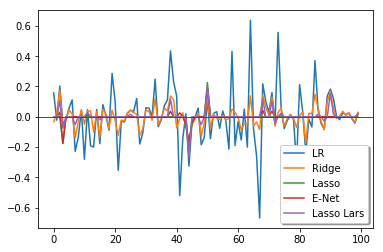

In [99]:
fig, ax = plt.subplots()
plt.plot(model_LR.coef_, label='LR')
plt.plot(model_rr.coef_, label='Ridge')
plt.plot(model_lr.coef_, label='Lasso')
plt.plot(model_en.coef_, label='E-Net')
plt.plot(model_ll.coef_, label='Lasso Lars')
plt.axhline(linewidth=1, color='g') # for reference
legend = ax.legend(loc='lower right', shadow=True)
plt.show()

### Final Comments
Overall, the best model was the Ridge Regression model with an alpha of 1.7.  The Ridge Score was 0.687 and the Mean Squared Error was 0.0169, which was much better than the other models tested.